In [2]:
%run data.py

In [3]:
results_df = fetch_nycOpenData(nyc_licenseApp, 100, 500000)
results_df.head(10)

,application_id,license_number,license_type,application_or_renewal,business_name,status,start_date,end_date,license_category,application_category,...,contact_phone,longitude,latitude,unit_type,unit,description,street_2,temp_op_letter_issued,temp_op_letter_expiration,active_vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,2017-01-09T00:00:00.000,2017-01-10T00:00:00.000,Home Improvement Contractor,Special,...,9178047161,-73.877091,40.876214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,2019-01-09T00:00:00.000,2019-01-10T00:00:00.000,Dealer In Products,Basic,...,2129251900,-73.996169,40.7141181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,2016-12-31T00:00:00.000,2017-01-10T00:00:00.000,Electronics Store,Basic,...,347-987-3235,-73.954098,40.7298694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,2018-12-31T00:00:00.000,2019-01-08T00:00:00.000,Electronics Store,Basic,...,718-484-7746,-73.949327,40.6508262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3891-2019-ALAU,2085269-DCA,Business,Application,"A-LIN LAUNDROMAT, INC.",Issued,2019-04-07T00:00:00.000,2019-05-02T00:00:00.000,Laundries,Basic,...,NaN,-74.015602,40.6435489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12418-2017-AELE,2057790-DCA,Business,Application,RIDGE WIRELESS CORP,Issued,2017-08-31T00:00:00.000,2017-09-02T00:00:00.000,Electronics Store,Basic,...,NaN,-74.031289,40.6156532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,949-2017-RHIC,1338463-DCA,Business,Renewal,"TAORMINA, MICHAEL",Issued,2017-01-06T00:00:00.000,2017-01-07T00:00:00.000,Home Improvement Contractor,Special,...,6312362914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,348-2017-RDEB,1325842-DCA,Business,Renewal,CREDIGY RECEIVABLES INC.,Issued,2017-01-09T00:00:00.000,2017-01-11T00:00:00.000,Debt Collection Agency,Basic,...,702-543-3036,NaN,NaN,UNIT,303,NaN,NaN,NaN,NaN,NaN
8,7887-2016-RPDD,1387189-DCA,Individual,Renewal,SOULEYMANE TOURE,Issued,2016-05-06T00:00:00.000,2016-05-06T00:00:00.000,Pedicab Driver,Basic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30775-2018-RHIC,2026096-DCA,Business,Renewal,AMERICAN STANDARD INTERIORS CORP,Denied,2018-12-05T00:00:00.000,2019-01-07T00:00:00.000,Home Improvement Contractor,Special,...,NaN,-73.929278,40.7599091,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pandas_to_spark(results_df)

In [5]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import month, year
df = df.withColumn("date", to_timestamp("start_date", "yyyy-MM-dd'T'HH:mm:ss.SSS"))
df = df.filter(year(df["date"]) >= 2020)
data = df.groupBy(month("date").alias("month")).count().orderBy("month")

In [6]:
import matplotlib.pyplot as plt
plt.close('all')

d = data.toPandas()
d.head()

,month,count
0,1,3314
1,2,2748
2,3,1844
3,4,438


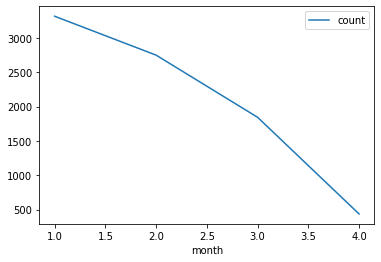

In [7]:
d.plot(x = "month", y = "count")